In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [5]:
#load dataset
df = pd.read_csv("ecommerce_customer_data.csv")
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [7]:
# Convert 'Purchase Date' to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Check for any missing values
print(df.isnull().sum())

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64


In [11]:
# Convert 'Returns' to numeric, forcing errors to NaN
df['Returns'] = pd.to_numeric(df['Returns'], errors='coerce')

# Check unique values again to see if non-numeric values are removed
print(df['Returns'].unique())


[ 1.  0. nan]


In [12]:
# Fill remaining NaN values in 'Returns' with 0
df['Returns'].fillna(0, inplace=True)

# Check unique values to confirm
print(df['Returns'].unique())


[1. 0.]


In [13]:
# Check for any remaining NaN values
print(df['Returns'].isnull().sum())


0


In [14]:
# Create a pivot table
customer_product_matrix = df.pivot_table(
    index='Customer ID',
    columns='Product Category',
    values='Quantity',
    aggfunc='sum',
    fill_value=0  # Fill missing values with 0
)

# Display the customer-product matrix
print(customer_product_matrix.head())


Product Category  Books  Clothing  Electronics  Home
Customer ID                                         
1                     5         5            5     0
2                     1         2           11     4
3                     0         4            8     3
4                     8         5            3     3
5                     5         0            0     8


In [17]:
# Convert quantities to binary values (1 if bought, 0 if not)
customer_product_matrix_binary = (customer_product_matrix > 0).astype(int)

# Display the first few rows of the binary matrix
print(customer_product_matrix_binary.head())


Product Category  Books  Clothing  Electronics  Home
Customer ID                                         
1                     1         1            1     0
2                     1         1            1     1
3                     0         1            1     1
4                     1         1            1     1
5                     1         0            0     1


In [18]:
from mlxtend.frequent_patterns import apriori, association_rules

# Find frequent itemsets
frequent_itemsets = apriori(customer_product_matrix_binary, min_support=0.01, use_colnames=True)

# Display frequent itemsets
print(frequent_itemsets.head())


    support           itemsets
0  0.714927            (Books)
1  0.717948         (Clothing)
2  0.719136      (Electronics)
3  0.719921             (Home)
4  0.510219  (Books, Clothing)


D:\anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [19]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Display the generated rules
print(rules.head())


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [20]:
# Check the frequent itemsets
print(frequent_itemsets)


     support                              itemsets
0   0.714927                               (Books)
1   0.717948                            (Clothing)
2   0.719136                         (Electronics)
3   0.719921                                (Home)
4   0.510219                     (Books, Clothing)
5   0.508951                  (Books, Electronics)
6   0.511246                         (Books, Home)
7   0.512193               (Clothing, Electronics)
8   0.512595                      (Clothing, Home)
9   0.513642                   (Home, Electronics)
10  0.362619        (Books, Clothing, Electronics)
11  0.364089               (Books, Clothing, Home)
12  0.362961            (Books, Home, Electronics)
13  0.365317         (Clothing, Home, Electronics)
14  0.258070  (Books, Clothing, Home, Electronics)


In [22]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules with a lower threshold for confidence
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Display the generated rules
print(rules)


                       antecedents              consequents  \
0                          (Books)               (Clothing)   
1                       (Clothing)                  (Books)   
2                          (Books)            (Electronics)   
3                    (Electronics)                  (Books)   
4                          (Books)                   (Home)   
5                           (Home)                  (Books)   
6                       (Clothing)            (Electronics)   
7                    (Electronics)               (Clothing)   
8                       (Clothing)                   (Home)   
9                           (Home)               (Clothing)   
10                          (Home)            (Electronics)   
11                   (Electronics)                   (Home)   
12               (Books, Clothing)            (Electronics)   
13            (Books, Electronics)               (Clothing)   
14         (Clothing, Electronics)                  (Bo

Confidence Distribution:
count    46.000000
mean      0.631032
std       0.101429
min       0.502431
25%       0.507146
50%       0.709382
75%       0.712215
max       0.715103
Name: confidence, dtype: float64

Lift Distribution:
count    46.000000
mean      0.990226
std       0.002469
min       0.984735
25%       0.988447
50%       0.990640
75%       0.992015
max       0.994036
Name: lift, dtype: float64


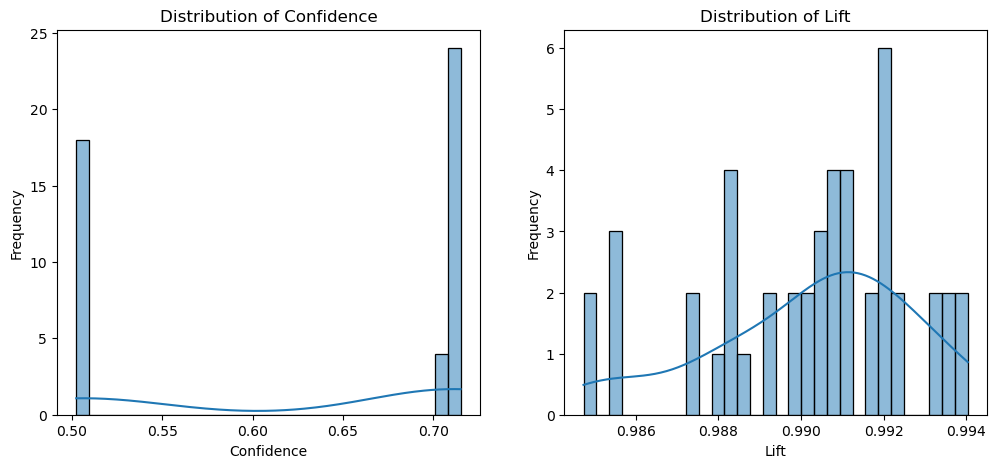

In [24]:
# Display basic statistics for confidence and lift
print("Confidence Distribution:")
print(rules['confidence'].describe())

print("\nLift Distribution:")
print(rules['lift'].describe())

# Visualize the distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(rules['confidence'], bins=30, kde=True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(rules['lift'], bins=30, kde=True)
plt.title('Distribution of Lift')
plt.xlabel('Lift')
plt.ylabel('Frequency')

plt.show()


In [25]:
# Adjust thresholds based on analysis
min_confidence = 0.55  # Lowered threshold for confidence
min_lift = 0.98  # Lowered threshold for lift

# Filter for strong rules with adjusted criteria
strong_rules = rules[(rules['confidence'] > min_confidence) & (rules['lift'] > min_lift)]

# Sort and display the top 10 strong rules
strong_rules_sorted = strong_rules.sort_values(by='lift', ascending=False)
print("Top 10 Strong Rules after Adjusting Criteria:")
print(strong_rules_sorted.head(10))


Top 10 Strong Rules after Adjusting Criteria:
             antecedents    consequents  antecedent support  \
0                (Books)     (Clothing)            0.714927   
1             (Clothing)        (Books)            0.717948   
20      (Clothing, Home)        (Books)            0.512595   
4                (Books)         (Home)            0.714927   
5                 (Home)        (Books)            0.719921   
13  (Books, Electronics)     (Clothing)            0.508951   
10                (Home)  (Electronics)            0.719921   
11         (Electronics)         (Home)            0.719136   
6             (Clothing)  (Electronics)            0.717948   
7          (Electronics)     (Clothing)            0.719136   

    consequent support   support  confidence      lift  leverage  conviction  \
0             0.717948  0.510219    0.713666  0.994036 -0.003061    0.985047   
1             0.714927  0.510219    0.710664  0.994036 -0.003061    0.985264   
20            0.7149

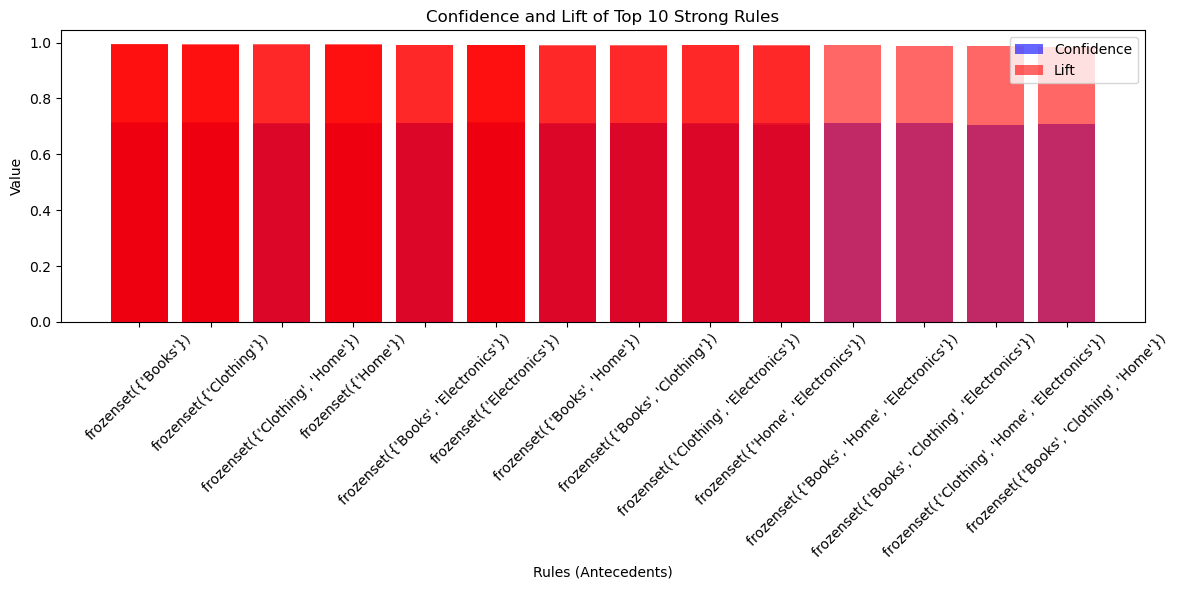

In [26]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot for confidence and lift
plt.bar(strong_rules_sorted['antecedents'].astype(str), strong_rules_sorted['confidence'], alpha=0.6, label='Confidence', color='b')
plt.bar(strong_rules_sorted['antecedents'].astype(str), strong_rules_sorted['lift'], alpha=0.6, label='Lift', color='r')

# Adding titles and labels
plt.title('Confidence and Lift of Top 10 Strong Rules')
plt.xlabel('Rules (Antecedents)')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


This graph presents a stacked bar chart depicting the **Confidence** and **Lift** values for the top 10 strong association rules derived from your analysis. Here's a detailed explanation of its components:

### Components of the Graph:

1. **Axes**:
   - **X-Axis (Rules/Antecedents)**: The x-axis lists the top 10 association rules represented as frozen sets (e.g., `frozenset({‘Books’})`, `frozenset({‘Clothing’, ‘Home’})`, etc.). These represent combinations of items that are frequently purchased together.
   - **Y-Axis (Value)**: The y-axis measures the values of Confidence and Lift, ranging from 0 to 1.

2. **Bars**:
   - Each bar corresponds to a specific association rule (antecedent).
   - The bars are divided into two segments:
     - The **bottom segment** (in a darker shade) represents **Confidence**.
     - The **top segment** (in a lighter shade) represents **Lift**.
  
3. **Legend**:
   - The legend on the right indicates which color corresponds to Confidence (blue) and Lift (red).

### Key Concepts:

- **Confidence**: This measures the likelihood that a customer who buys the antecedent (the items in the frozen set) will also buy the consequent (not shown here). A high confidence value (close to 1) suggests a strong association between the items.
  
- **Lift**: This is a measure of how much more likely the consequent is to be purchased when the antecedent is purchased compared to the overall likelihood of the consequent being purchased. A lift value greater than 1 indicates a positive association, while a value less than 1 indicates a negative or no association.

### Interpretation:

- **Strong Associations**: Most of the rules in this chart have high confidence values (close to 1), indicating that if a customer buys the items in the antecedent, they are likely to buy the consequent.
  
- **Variation in Lift**: While confidence is consistently high, lift varies among the rules. This suggests that while purchasing the antecedent, the additional likelihood of buying the consequent (as indicated by lift) can differ. Some combinations show very high lift values, indicating particularly strong associations.

### Conclusion:

This graph helps visualize the strength of product associations in your dataset, guiding marketing strategies, inventory management, and personalized recommendations based on consumer purchasing patterns. You can focus on the strongest rules for cross-selling opportunities based on the high confidence and lift values.

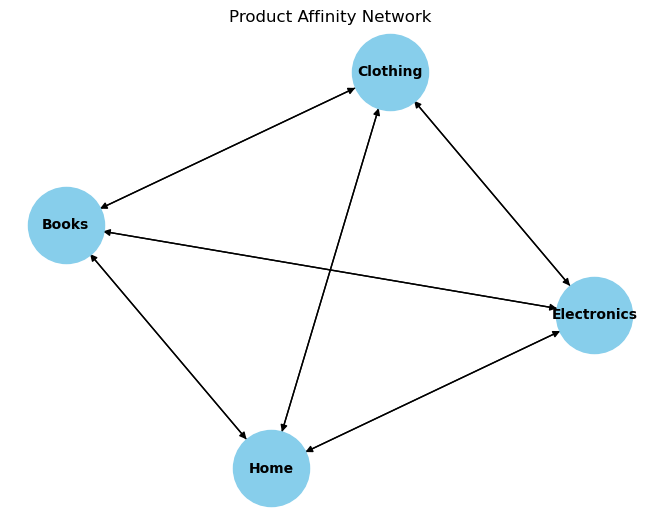

In [27]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges based on the strong rules
for index, row in strong_rules_sorted.iterrows():
    antecedents = row['antecedents']
    consequents = row['consequents']
    G.add_edge(list(antecedents)[0], list(consequents)[0], weight=row['lift'])

# Draw the graph
pos = nx.spring_layout(G)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', width=weights)
plt.title("Product Affinity Network")
plt.show()


The graph represents a **Product Affinity Network**, which is a visual representation of how different product categories are related based on customer purchasing behavior. Here’s a breakdown of the key elements in the graph:

### Nodes (Circles)
- **Clothing**
- **Electronics**
- **Home**
- **Books**

These nodes represent different product categories. Each circle indicates a category of products that customers can purchase.

### Edges (Lines)
The lines connecting the nodes indicate the **affinity** between the product categories. This means that if customers tend to buy items from one category together with another category, a line is drawn between those two nodes. For example:
- A line between **Clothing** and **Electronics** suggests that customers who buy clothing are also likely to purchase electronics.
- Similarly, lines between **Home** and **Books** indicate an affinity in purchasing behavior between those categories.

### Interpretation
1. **Cross-Selling Opportunities**: The connections suggest potential areas for cross-selling. For instance, if customers who buy clothing also frequently purchase electronics, marketing strategies can focus on promoting electronics to clothing buyers.
2. **Product Recommendations**: The network can inform recommendation systems. If a customer shows interest in one category, they can be recommended products from the categories to which they are connected.
3. **Customer Insights**: The strength of the connections (if indicated, e.g., by thickness of lines) could provide insights into how strongly related the product categories are based on historical purchasing data.

### Conclusion
This Product Affinity Network helps retailers understand customer preferences and behaviors, enabling them to tailor marketing strategies, optimize inventory, and enhance the overall shopping experience by providing relevant product suggestions.

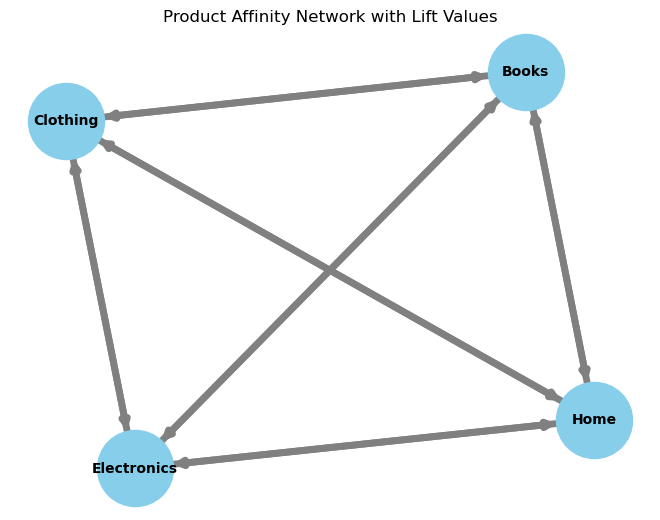

In [28]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges based on strong rules with weights for lift
for index, row in strong_rules_sorted.iterrows():
    antecedents = list(row['antecedents'])[0]  # Extract the single antecedent
    consequents = list(row['consequents'])[0]  # Extract the single consequent
    lift_value = row['lift']  # Use lift value as weight
    G.add_edge(antecedents, consequents, weight=lift_value)

# Draw the graph with weights as edge thickness
pos = nx.spring_layout(G)
edges = G.edges(data=True)

# Set edge width based on lift values
weights = [edge[2]['weight'] * 5 for edge in edges]  # Scale lift for visualization

nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', width=weights, edge_color='gray')
plt.title("Product Affinity Network with Lift Values")
plt.show()


In [29]:
# Create a directed graph from your strong association rules
G = nx.DiGraph()

# Add edges with lift as weight
for index, row in strong_rules_sorted.iterrows():
    antecedents = list(row['antecedents'])[0]  # Get the antecedent
    consequents = list(row['consequents'])[0]  # Get the consequent
    lift_value = row['lift']
    G.add_edge(antecedents, consequents, weight=lift_value)

# Calculate network metrics
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Convert metrics to a DataFrame for analysis
metrics_df = pd.DataFrame({
    'Node': degree_centrality.keys(),
    'Degree Centrality': degree_centrality.values(),
    'Closeness Centrality': closeness_centrality.values(),
    'Betweenness Centrality': betweenness_centrality.values(),
})

print(metrics_df.sort_values(by='Degree Centrality', ascending=False))


          Node  Degree Centrality  Closeness Centrality  \
0        Books                2.0                   1.0   
1     Clothing                2.0                   1.0   
2         Home                2.0                   1.0   
3  Electronics                2.0                   1.0   

   Betweenness Centrality  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  


In [31]:
def recommend_products(purchased_item):
    recommendations = []
    for index, row in strong_rules_sorted.iterrows():
        if purchased_item in row['antecedents']:
            recommendations.append(list(row['consequents'])[0])
    return set(recommendations)

# Example usage
purchased_item = 'Clothing'
recommended_items = recommend_products(purchased_item)
print(f"If a customer buys {purchased_item}, recommend: {recommended_items}")


If a customer buys Clothing, recommend: {'Books', 'Home', 'Electronics'}


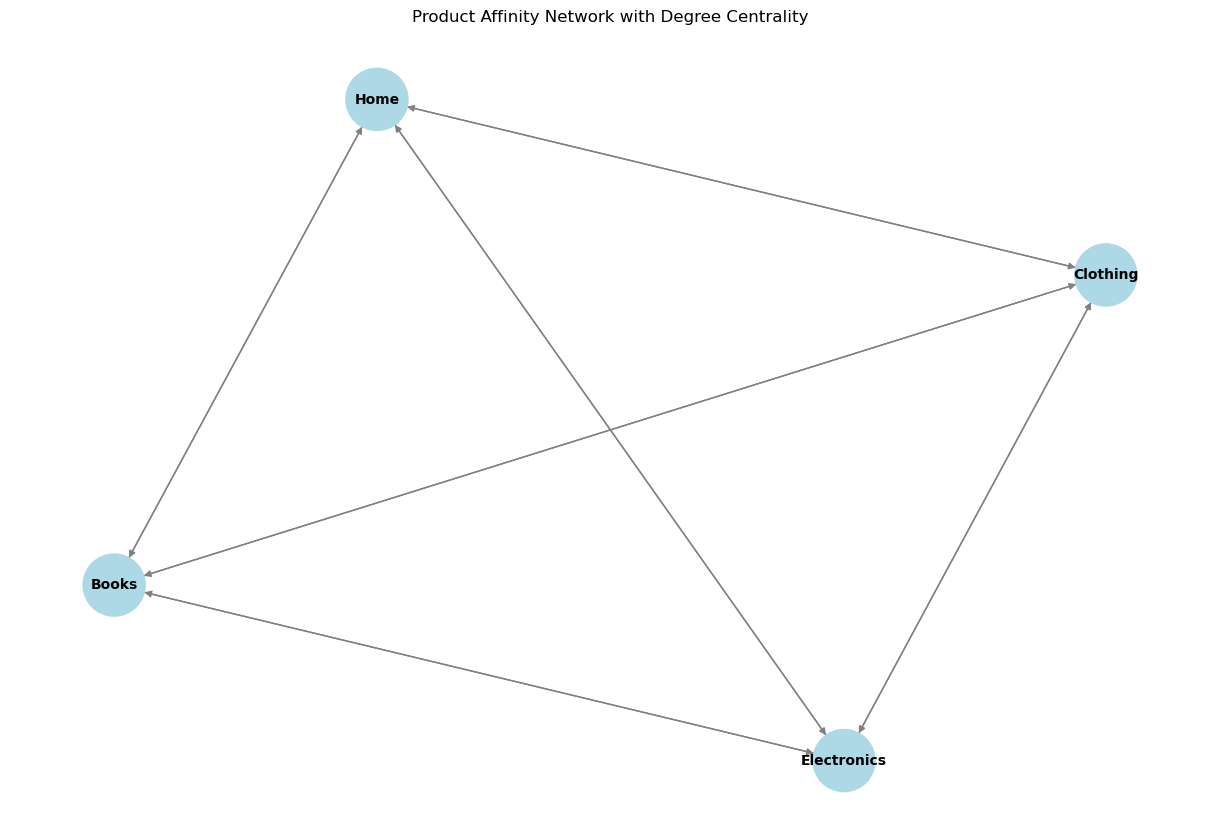

In [32]:
import matplotlib.pyplot as plt

# Draw the graph with node size based on degree centrality
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
node_sizes = [v * 1000 for v in degree_centrality.values()]  # Scale node sizes

nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title("Product Affinity Network with Degree Centrality")
plt.show()
